In [2]:
import numpy as np
import pandas as pd
import queue
import matplotlib.pyplot as plt

from Backtest.backtest import Backtest
from Backtest.data import OHLCDataHandler
from RSIStrategy import RSIStrategy
from Backtest.open_json_gz_files import open_json_gz_files
from Backtest.generate_bars import generate_bars

In [3]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import hyperopt.pyll.stochastic

In [4]:
def run_backtest(config, trading_data, ohlc_data, window, s, b):
    window = int(window)
    s = int(s)
    b = int(b)
    config['title'] = "RSIStrategy" + "_" + str(window) + "_" + str(s) + "_" + str(b)
    print("---------------------------------")
    print(config['title'])
    print("---------------------------------")
    
    events_queue = queue.Queue()

    data_handler = OHLCDataHandler(
        config, events_queue,
        trading_data = trading_data, ohlc_data = ohlc_data
    )
    strategy = RSIStrategy(config, events_queue, data_handler,
                            window=window, s=s, b=b)

    backtest = Backtest(config, events_queue, strategy,
                        data_handler= data_handler)

    results = backtest.start_trading()
    
    # dict_ans = {
    #     "window": [window],
    #     "s": [s],
    #     "b": [b],
    #     "Sharpe Ratio": [results['sharpe']],
    #     "Total Returns": [(results['cum_returns'][-1] - 1)],
    #     "Max Drawdown": [(results["max_drawdown"] * 100.0)],
    #     "Max Drawdown Duration": [(results['max_drawdown_duration'])],
    #     "Trades": [results['trade_info']['trading_num']],
    #     "Trade Winning": [results['trade_info']['win_pct']],
    #     "Average Trade": [results['trade_info']['avg_trd_pct']],
    #     "Average Win": [results['trade_info']['avg_win_pct']],
    #     "Average Loss": [results['trade_info']['avg_loss_pct']],
    #     "Best Trade": [results['trade_info']['max_win_pct']],
    #     "Worst Trade": [results['trade_info']['max_loss_pct']],
    #     "Worst Trade Date": [results['trade_info']['max_loss_dt']],
    #     "Avg Days in Trade": [results['trade_info']['avg_dit']]
    # }
    # return pd.DataFrame(dict_ans)
    return -1 * (results['cum_returns'][-1] - 1)

In [5]:
def f(params):
    config = {
        "csv_dir": "C:/backtest/Binance",
        "out_dir": "C:/backtest/results/RSIStrategy",
        "title": "RSIStrategy",
        "is_plot": False,
        "save_plot": False,
        "save_tradelog": False,
        "start_date": pd.Timestamp("2017-07-01T00:0:00", freq = "60" + "T"),    # str(freq) + "T"
        "end_date": pd.Timestamp("2018-04-01T00:00:00", freq = "60" + "T"),
        "equity": 1.0,
        "freq": 60,      # min
        "commission_ratio": 0.001,
        "suggested_quantity": None,     # None or a value
        "max_quantity": None,           # None or a value, Maximum purchase quantity
        "min_quantity": None,           # None or a value, Minimum purchase quantity
        "min_handheld_cash": None,      # None or a value, Minimum handheld funds
        "exchange": "Binance",
        "tickers": ['BTCUSDT']
    }
    # trading_data = {}
    # for ticker in config['tickers']:
    #     # trading_data[ticker] = open_gz_files(config['csv_dir'], ticker)
    #     trading_data[ticker] = pd.read_hdf(config['csv_dir'] + '\\' + ticker + '.h5', key=ticker)

    ohlc_data = {}
    for ticker in config['tickers']:
        # ohlc_data[ticker] = generate_bars(trading_data, ticker, config['freq'])
        ohlc_data[ticker] = pd.read_hdf(config['csv_dir'] + '\\' + ticker + '_OHLC_60min.h5', key=ticker)

    trading_data = None
    
    window = params['window']
    s = params['s']
    b = params['b']
    val = run_backtest(config, trading_data, ohlc_data,  window, s, b)
    return {'loss': val, 'status': STATUS_OK}

In [14]:
space = {
    'window': hp.choice('window', tuple(np.arange(1, 120, 1))),
    's': hp.choice('s', tuple(np.arange(55, 85, 1))),
    'b': hp.choice('b', tuple(np.arange(15, 45, 1))),
}

In [15]:
# print(hyperopt.pyll.stochastic.sample(space))

In [16]:
trials = Trials()

In [18]:
best = fmin(fn=f, space=space, algo=tpe.suggest, max_evals=150, trials=trials)

---------------------------------
RSIStrategy_91_60_22
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: nan
Max Drawdown: 0.0000000000
Max Drawdown Duration: 0
Total Returns: 0.0000000000
---------------------------------
Trades: 0
Trade Winning: N/A
Average Trade: N/A
Average Win: N/A
Average Loss: N/A
Best Trade: N/A
Worst Trade: N/A
Worst Trade Date: 0
Avg Days in Trade: 0
---------------------------------
---------------------------------
RSIStrategy_52_83_30
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backte

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.7284123669
Max Drawdown: 69.3396585403
Max Drawdown Duration: 2510
Total Returns: 0.2160356509
---------------------------------
Trades: 0
Trade Winning: N/A
Average Trade: N/A
Average Win: N/A
Average Loss: N/A
Best Trade: N/A
Worst Trade: N/A
Worst Trade Date: 0
Avg Days in Trade: 0
---------------------------------
---------------------------------
RSIStrategy_82_59_44
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -1.0138392961
Max Drawdown: 59.5813259439
Max Drawdown Duration: 1953
Total Returns: -0.5070660312
---------------------------------
Trades: 7
Trade Winning: 57%
Average Trade: -4.82%
Average Win: 7.00

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: nan
Max Drawdown: 0.0000000000
Max Drawdown Duration: 0
Total Returns: 0.0000000000
---------------------------------
Trades: 0
Trade Winning: N/A
Average Trade: N/A
Average Win: N/A
Average Loss: N/A
Best Trade: N/A
Worst Trade: N/A
Worst Trade Date: 0
Avg Days in Trade: 0
---------------------------------
---------------------------------
RSIStrategy_85_72_27
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: nan
Max Drawdown: 0.0000000000
Max Drawdown Duration: 0
Total Returns: 0.0000000000
---------------------------------
Trades: 0
Trade Winning: N/A
Average Trade: N/A
Average Win: N/A
Average Loss: N/A
Best Trade: N

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.9618726133
Max Drawdown: 55.8599820721
Max Drawdown Duration: 2455
Total Returns: -0.4389261945
---------------------------------
Trades: 33
Trade Winning: 58%
Average Trade: -1.24%
Average Win: 4.15%
Average Loss: -8.56%
Best Trade: 15.55%
Worst Trade: -16.54%
Worst Trade Date: 6 days 13:00:00
Avg Days in Trade: 1 days 21:14:33
---------------------------------
---------------------------------
RSIStrategy_106_56_32
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: nan
Max Drawdown: 0.0000000000
Max Drawdown Duration: 0
Total Returns: 0.0000000000
---------------------------------
Trades: 0
Trade Winning: N/A
Average

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.8082034006
Max Drawdown: 41.2875506926
Max Drawdown Duration: 1695
Total Returns: 1.1842258449
---------------------------------
Trades: 583
Trade Winning: 70%
Average Trade: 0.36%
Average Win: 1.42%
Average Loss: -2.16%
Best Trade: 12.31%
Worst Trade: -10.22%
Worst Trade Date: 0 days 07:00:00
Avg Days in Trade: 0 days 03:01:08
---------------------------------
---------------------------------
RSIStrategy_18_65_38
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.6438231860
Max Drawdown: 57.7659217147
Max Drawdown Duration: 2485
Total Returns: -0.4061133052
---------------------------------
Trades: 37
Trade Winning

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.5036454573
Max Drawdown: 41.4338260454
Max Drawdown Duration: 1843
Total Returns: 0.1019435535
---------------------------------
Trades: 320
Trade Winning: 68%
Average Trade: 0.27%
Average Win: 1.63%
Average Loss: -2.68%
Best Trade: 9.05%
Worst Trade: -16.27%
Worst Trade Date: 1 days 02:00:00
Avg Days in Trade: 0 days 04:35:38
---------------------------------
---------------------------------
RSIStrategy_2_78_15
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.0625109084
Max Drawdown: 34.1752647241
Max Drawdown Duration: 558
Total Returns: 1.4416157513
---------------------------------
Trades: 454
Trade Winning: 70

---------------------------------
RSIStrategy_93_73_35
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.3853152297
Max Drawdown: 42.9010334392
Max Drawdown Duration: 941
Total Returns: -0.2211825521
---------------------------------
Trades: 0
Trade Winning: N/A
Average Trade: N/A
Average Win: N/A
Average Loss: N/A
Best Trade: N/A
Worst Trade: N/A
Worst Trade Date: 0
Avg Days in Trade: 0
---------------------------------
---------------------------------
RSIStrategy_90_68_19
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
--------------------------

---------------------------------
RSIStrategy_15_74_44
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.2502532156
Max Drawdown: 64.3868548025
Max Drawdown Duration: 2485
Total Returns: -0.3012838985
---------------------------------
Trades: 40
Trade Winning: 70%
Average Trade: 0.26%
Average Win: 5.06%
Average Loss: -10.94%
Best Trade: 16.18%
Worst Trade: -25.02%
Worst Trade Date: 7 days 13:00:00
Avg Days in Trade: 2 days 10:28:30
---------------------------------
---------------------------------
RSIStrategy_27_64_21
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.3305960466
Max Drawdown: 45.3205678504
Max Drawdown Duration: 2723
Total Returns: 0.0076147851
---------------------------------
Trades: 83
Trade Winning: 69%
Average Trade: 0.35%
Average Win: 3.22%
Average Loss: -5.94%
Best Trade: 9.41%
Worst Trade: -17.53%
Worst Trade Date: 2 days 03:00:00
Avg Days in Trade: 0 days 20:59:17
---------------------------------
---------------------------------
RSIStrategy_2_77_31
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.4844535782
Max Drawdown: 44.6872446578
Max Drawdown Duration: 1696
Total Returns: 0.8490564107
---------------------------------
Trades: 518
Trade Winning: 68

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.1137502275
Max Drawdown: 64.8568440880
Max Drawdown Duration: 2485
Total Returns: -0.2796622149
---------------------------------
Trades: 19
Trade Winning: 74%
Average Trade: 1.20%
Average Win: 8.37%
Average Loss: -18.85%
Best Trade: 13.91%
Worst Trade: -48.85%
Worst Trade Date: 33 days 05:00:00
Avg Days in Trade: 5 days 13:15:47
---------------------------------
---------------------------------
RSIStrategy_71_55_33
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.1638099603
Max Drawdown: 15.7512437811
Max Drawdown Duration: 568
Total Returns: -0.0208375070
---------------------------------
Trades: 1
Trade Winnin

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: nan
Max Drawdown: 0.0000000000
Max Drawdown Duration: 0
Total Returns: 0.0000000000
---------------------------------
Trades: 0
Trade Winning: N/A
Average Trade: N/A
Average Win: N/A
Average Loss: N/A
Best Trade: N/A
Worst Trade: N/A
Worst Trade Date: 0
Avg Days in Trade: 0
---------------------------------
---------------------------------
RSIStrategy_49_74_29
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.1567562498
Max Drawdown: 33.3904477612
Max Drawdown Duration: 568
Total Returns: -0.0748999217
---------------------------------
Trades: 1
Trade Winning: 100%
Average Trade: 29.64%
Average Win: 29.64%
Average Lo

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.7699701036
Max Drawdown: 69.3396585403
Max Drawdown Duration: 2510
Total Returns: 0.2548065827
---------------------------------
Trades: 0
Trade Winning: N/A
Average Trade: N/A
Average Win: N/A
Average Loss: N/A
Best Trade: N/A
Worst Trade: N/A
Worst Trade Date: 0
Avg Days in Trade: 0
---------------------------------
---------------------------------
RSIStrategy_91_71_31
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: nan
Max Drawdown: 0.0000000000
Max Drawdown Duration: 0
Total Returns: 0.0000000000
---------------------------------
Trades: 0
Trade Winning: N/A
Average Trade: N/A
Average Win: N/A
Average Loss: N/A


In [26]:
window_int = tuple(np.arange(1, 240, 1))
s_int = tuple(np.arange(55, 85, 1))
b_int = tuple(np.arange(15, 45, 1))

In [27]:
{
    'window': window_int[best['window']],
    's': s_int[best['s']],
    'b': b_int[best['b']],
}

{'window': 2, 's': 78, 'b': 15}

In [31]:
best

{'b': 0, 's': 23, 'window': 1}

In [28]:
for trial in trials.trials:
    print(trial['misc']['vals'], "\t",trial['result']['loss'])

{'b': [10], 's': [20], 'window': [6]} 	 -0.12658175272066963
{'b': [17], 's': [29], 'window': [5]} 	 0.02039248233399049
{'b': [3], 's': [25], 'window': [22]} 	 0.3490211778892218
{'b': [18], 's': [26], 'window': [48]} 	 0.35663920960904183
{'b': [19], 's': [6], 'window': [116]} 	 -0.0
{'b': [17], 's': [5], 'window': [69]} 	 0.07542862961149444
{'b': [3], 's': [14], 'window': [67]} 	 -0.0
{'b': [15], 's': [5], 'window': [118]} 	 -0.0
{'b': [25], 's': [1], 'window': [61]} 	 0.20462663388095093
{'b': [26], 's': [6], 'window': [97]} 	 -0.08411734136058313
{'b': [7], 's': [5], 'window': [90]} 	 -0.0
{'b': [15], 's': [28], 'window': [51]} 	 -0.10069288056835313
{'b': [7], 's': [7], 'window': [57]} 	 -0.0
{'b': [23], 's': [14], 'window': [43]} 	 0.36780119848409165
{'b': [26], 's': [15], 'window': [77]} 	 0.180416586178062
{'b': [24], 's': [0], 'window': [60]} 	 0.07787289694817345
{'b': [15], 's': [10], 'window': [50]} 	 0.013451292967366468
{'b': [9], 's': [24], 'window': [34]} 	 -0.234018

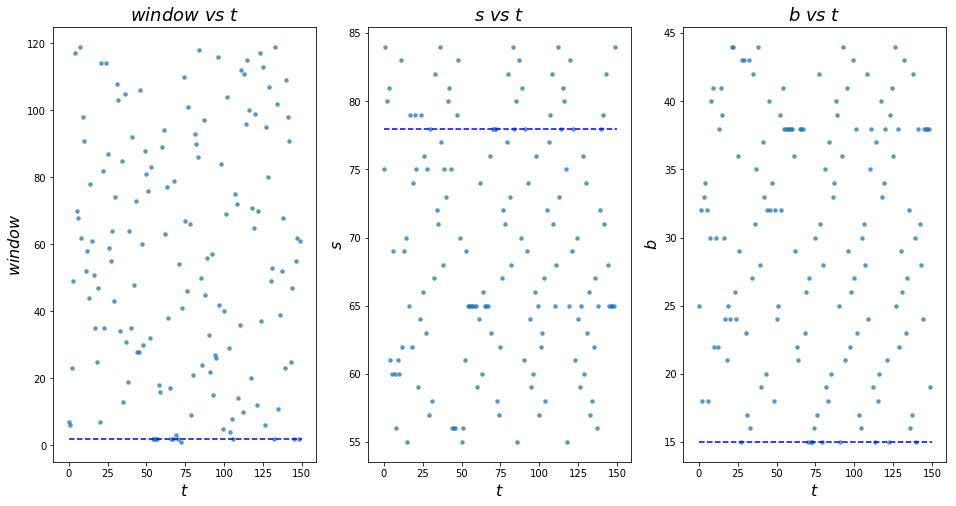

In [29]:
f, ax = plt.subplots(1,3, figsize = (16, 8))
xs = [t['tid'] for t in trials.trials]
ys = [window_int[t['misc']['vals']['window'][0]] for t in trials.trials]
ax[0].set_xlim(xs[0]-10, xs[-1]+10)
ax[0].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax[0].set_title('$window$ $vs$ $t$ ', fontsize=18)
ax[0].set_xlabel('$t$', fontsize=16)
ax[0].set_ylabel('$window$', fontsize=16)
ax[0].hlines(window_int[best['window']], 0, 150,color='blue',linestyle="--")

xs = [t['tid'] for t in trials.trials]
ys = [s_int[t['misc']['vals']['s'][0]] for t in trials.trials]
ax[1].set_xlim(xs[0]-10, xs[-1]+10)
ax[1].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax[1].set_title('$s$ $vs$ $t$ ', fontsize=18)
ax[1].set_xlabel('$t$', fontsize=16)
ax[1].set_ylabel('$s$', fontsize=16)
ax[1].hlines(s_int[best['s']], 0, 150,color='blue',linestyle="--")

xs = [t['tid'] for t in trials.trials]
ys = [b_int[t['misc']['vals']['b'][0]] for t in trials.trials]
ax[2].set_xlim(xs[0]-10, xs[-1]+10)
ax[2].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax[2].set_title('$b$ $vs$ $t$ ', fontsize=18)
ax[2].set_xlabel('$t$', fontsize=16)
ax[2].set_ylabel('$b$', fontsize=16)
ax[2].hlines(b_int[best['b']], 0, 150,color='blue',linestyle="--")

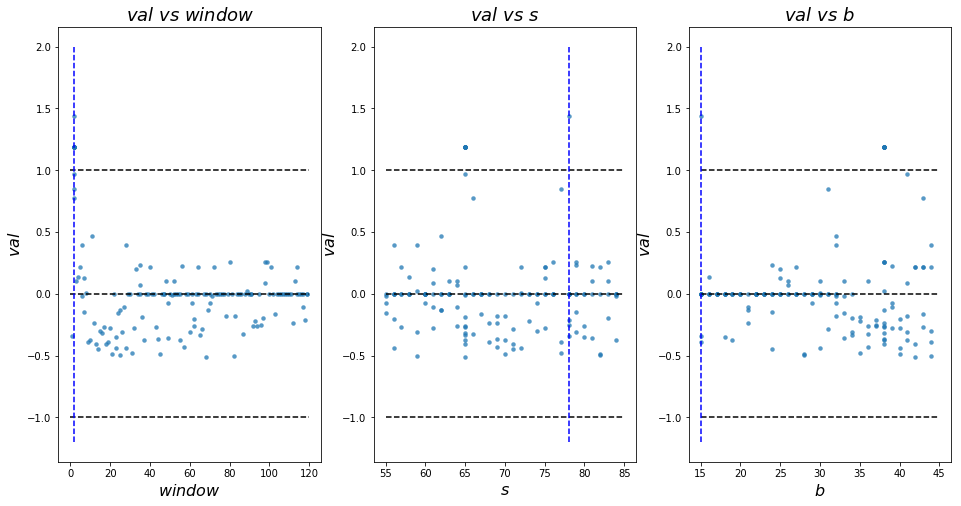

In [30]:
f, ax = plt.subplots(1,3, figsize = (16, 8))
xs = [window_int[t['misc']['vals']['window'][0]] for t in trials.trials]
ys = [-1 * t['result']['loss'] for t in trials.trials]
ax[0].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax[0].set_title('$val$ $vs$ $window$ ', fontsize=18)
ax[0].set_xlabel('$window$', fontsize=16)
ax[0].set_ylabel('$val$', fontsize=16)
ax[0].hlines(0, 0, 120, color='black',linestyle="--")
ax[0].hlines(-1, 0, 120, color='black',linestyle="--")
ax[0].hlines(1, 0, 120, color='black',linestyle="--")
ax[0].vlines(window_int[best['window']], -1.2, 2, color='blue',linestyle="--")

xs = [s_int[t['misc']['vals']['s'][0]] for t in trials.trials]
ys = [-1 * t['result']['loss'] for t in trials.trials]
ax[1].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax[1].set_title('$val$ $vs$ $s$ ', fontsize=18)
ax[1].set_xlabel('$s$', fontsize=16)
ax[1].set_ylabel('$val$', fontsize=16)
ax[1].hlines(0, 55, 85,color='black',linestyle="--")
ax[1].hlines(-1, 55, 85, color='black',linestyle="--")
ax[1].hlines(1, 55, 85,color='black',linestyle="--")
ax[1].vlines(s_int[best['s']], -1.2, 2, color='blue',linestyle="--")

xs = [b_int[t['misc']['vals']['b'][0]] for t in trials.trials]
ys = [-1 * t['result']['loss'] for t in trials.trials]
ax[2].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax[2].set_title('$val$ $vs$ $b$ ', fontsize=18)
ax[2].set_xlabel('$b$', fontsize=16)
ax[2].set_ylabel('$val$', fontsize=16)
ax[2].hlines(0, 15, 45,color='black',linestyle="--")
ax[2].hlines(-1, 15, 45, color='black',linestyle="--")
ax[2].hlines(1, 15, 45,color='black',linestyle="--")
ax[2].vlines(b_int[best['b']], -1.2, 2, color='blue',linestyle="--")